In [1]:
import pandas as pd
from gensim.summarization.summarizer import summarize
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
import gensim
from gensim.models.fasttext import FastText
import gensim.models.word2vec
import gensim.downloader as api

In [2]:
from PIL import Image
import urllib.request
import time
from io import BytesIO
import requests

In [3]:
df = pd.read_csv('../db/editor_2.csv', low_memory=False)
df2 = pd.read_csv('../db/pic_db_7.csv', low_memory=False)

In [4]:
df['Keywords'] = df['Keywords'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
df2['Keywords'] = df2['Keywords'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
df['Keywords']
df2['Keywords']
title_array = []
keyword_array = []
picture_array = []
for i in range(len(df['Keywords'])):
    temp = df['Keywords'][i].split()
    keyword_array.append(temp)
    title_array.append(df['Title'][i])
    picture_array.append(df['14'][i])
for i in range(len(df2['Keywords'])):
    temp2 = df2['Keywords'][i].split()
    keyword_array.append(temp2)
    title_array.append(df2['Title'][i])
    picture_array.append(df2['14'][i])
print(keyword_array[0])
print(title_array[0])
print(len(keyword_array))
# print(keyword_array)
print(keyword_array[214403], picture_array[214403])

/var/folders/vh/782lvqbd7gv2dgmk1tvd2v1c0000gn/T/ipykernel_6778/57467832.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Keywords'] = df['Keywords'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
/var/folders/vh/782lvqbd7gv2dgmk1tvd2v1c0000gn/T/ipykernel_6778/57467832.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Keywords'] = df2['Keywords'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")


['통화', '정책', '인플레이션', '연준', '동결']
[속보] 연준, 통화정책 동결...성장.인플레이션 가속 예상
216638
['반', '선수단', '팀', '겨레', '국민'] https://image.shutterstock.com/image-vector/team-business-people-celebrate-success-260nw-2074834006.jpg


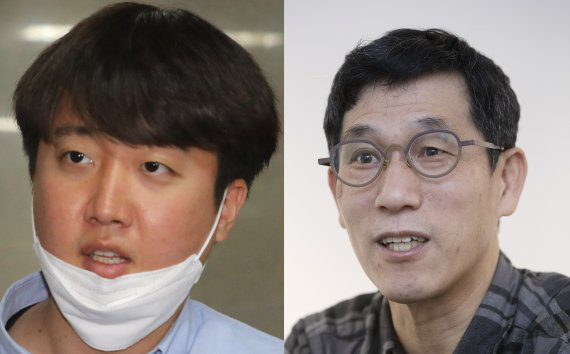

In [5]:
url = picture_array[2000]

res = requests.get(url)

#Img open
request_get_img = Image.open(BytesIO(res.content))
request_get_img

In [6]:
stopwords = ['으로', '하다', '지난해', '선인', '어치', '구역', '방문', '손님', '오전', '오후', '스도', '사비', '이씨', '제이',
            '천가', '디케', '이락', '올해', '고자', '일간', '계단', '향년', '자릿수', '사액', '현재', '이달', '바사', '와이', '바보',
            '앞으로', '데시', '대비', '니어', '반시', '나흘', '최승', '하루', '이스', '아너', '아난', '열자', '시노', '시스', '리프',
            '레시', '다시', '리보', '기존', '한시', '제가', '루타', '이난', '김광', '성제', '과기', '만지', '분분', '어스', '마다',
            '분이', '마의', '윤규', '장재', '프롬', '모어', '망가', '익스', '그니', '이드', '이지', '리오', '갈라치', 
            '아비', '그나', '유부', '안나', '티스', '종업', '맞이', '디파', '인트', '멀다', '수고', '대니', '빌다', '르망', '라보','장보',
            '아무', '푸라', '부음', '브리', '여태', '레비', '그니', '러시', '김강', '쏘다', '여지', '보다', '이다']
tokenized_data = []

In [7]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

for sentence in df['Keywords']:
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords and len(word) != 1] # 불용어 제거
#     print(stopwords_removed_sentence)
    tokenized_data.append(stopwords_removed_sentence)

In [8]:
for sentence2 in df2['Keywords']:
    if len(sentence2) != 0:
        tokenized_sentence2 = okt.morphs(sentence2, stem=True) # 토큰화
        stopwords_removed_sentence2 = [word for word in tokenized_sentence2 if not word in stopwords and len(word) != 1] # 불용어 제거
    #     print(stopwords_removed_sentence)
        tokenized_data.append(stopwords_removed_sentence2)

In [9]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, size = 100, window = 1, min_count = 10, workers = 4, sg = 0)
# Word2Vec model 은 단어간의 벡터적 유사도만을 값으로 가진다.

# model = FastText(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)
# FastText의 경우 단어간의 벡터 유사도 뿐만아니라 형태 유사도를 동시에 따진다 ex) 카카오톡과 카카오, 사탕, 코코아를 비슷한 단어로 분류한다.

# model = api.load("glove-wiki-gigaword-50")
# model
# model = gensim.models.KeyedVectors.load_word2vec_format('~/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz')
# print(model)
# GloVe model 의 경우 LAS(Latent Semantic Analysis)와 Word2Vec의 단점을 보완하는 목적으로 나왔고 성능이 우수한 편이다.
# 다만 한국어 버전을 제공하지 않는다.

In [21]:
print(model.wv.similarity('비트코인', '하락'))
print(model.wv.similarity('비트코인', '상승'))
print(model.wv.similarity('비트코인', '도지'))
print(model.wv.similarity('공유', '상승'))

0.5373484
0.4528312
0.89796937
0.14372423


In [30]:
print(model.wv.most_similar('비트코인'))

[('엘살바도르', 0.9169602394104004), ('인피니티', 0.9091616868972778), ('골드만삭스', 0.9061586856842041), ('도지', 0.8979694247245789), ('월스트리트', 0.8953796029090881), ('코인', 0.8915286660194397), ('포브스', 0.8841506242752075), ('억만장자', 0.8835643529891968), ('트위터', 0.8810054063796997), ('프로토콜', 0.8754608035087585)]


In [50]:
find_p = input().split('#')
print(find_p)

이준석
['이준석']


In [51]:
model.wv.most_similar(find_p[0])

[('홍준표', 0.9471173882484436),
 ('심상정', 0.9307807683944702),
 ('국민의당', 0.9299538135528564),
 ('진중권', 0.9290429353713989),
 ('유승민', 0.9264347553253174),
 ('감사원장', 0.9237141609191895),
 ('나경원', 0.9216960668563843),
 ('김재원', 0.9215048551559448),
 ('정세균', 0.9180833697319031),
 ('대위', 0.917811393737793)]

In [52]:
search_array = []
keyword_weight = []
for tag in range(len(find_p)):
    try:
#         print(model.wv.most_similar(find_p[tag+1]))
        for i in range(len(model.wv.most_similar(find_p[tag]))):
            search_array.append(model.wv.most_similar(find_p[tag])[i][0])
            keyword_weight.append(model.wv.most_similar(find_p[tag])[i][1])
    except:
        print(find_p[tag],"은(는) 추천할 기사가 없습니다.")
for i in range(len(find_p)-1):
    search_array.append(find_p[i])
    keyword_weight.append(1.0)
print(search_array)
print(keyword_weight)

['홍준표', '심상정', '국민의당', '진중권', '유승민', '감사원장', '나경원', '김재원', '정세균', '대위']
[0.9471173882484436, 0.9307807683944702, 0.9299538135528564, 0.9290429353713989, 0.9264347553253174, 0.9237141609191895, 0.9216960668563843, 0.9215048551559448, 0.9180833697319031, 0.917811393737793]


추천 기사 : 홍준표 '감옥설' 인용한 심상정 "특검 통해 진실 밝혀야"
해당 사진 : https://cdn.newming.io/news/c96ff7c4d5d97f244fe7368bf0738ffb_0.jpg


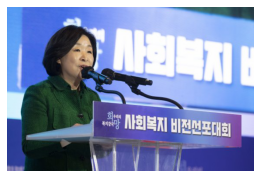

In [53]:
weight_sum = []
recommend_press3 = []
url_array = []
for a in range(len(keyword_array)):
    p_key = []
    for i in keyword_array[a]:                          # i = 키워드 1개
        if i in search_array:
            p_key.append(search_array.index(i))
    if len(p_key) >= 2:
        temp = 0
        for i in p_key:
            temp += keyword_weight[i]
        weight_sum.append(temp)
        recommend_press3.append(title_array[a])
        url_array.append(picture_array[a])
# print(url_array)
# print(weight_sum.index(max(weight_sum)))
# print(weight_sum)
# for i in weight_sum:
#     if i >= 2:
#         print("기사별 가중치 :", i)
if len(weight_sum) != 0:
    print("추천 기사 :", recommend_press3[weight_sum.index(max(weight_sum))])
    print("해당 사진 :", url_array[weight_sum.index(max(weight_sum))])
    url = url_array[weight_sum.index(max(weight_sum))]
    if pd.isna(url) == False:
        res = requests.get(url)
        request_get_img = Image.open(BytesIO(res.content))
        plt.figure(figsize = (15,15))
        plt.subplot(3,3,1)
        plt.axis('off')
        plt.imshow(request_get_img)
else:
    print("추천기사가 없습니다.")

홍준표 '감옥설' 인용한 심상정 "특검 통해 진실 밝혀야" https://cdn.newming.io/news/c96ff7c4d5d97f244fe7368bf0738ffb_0.jpg
치열해지는 국힘 4강전..4위자리는 누구? 관전포인트 https://cdn.newming.io/news/356fd16ee26aaba4aace1f2173f184cd_0.jpg
양강에 포화 집중하는 유… 4위 자리싸움 치열한 최·원 https://cdn.newming.io/news/bff16b5eae60977c0013b5acb83713d4_0.jpg
유승민측 '홍준표 후보되면 큰일' 김재원에 "또 낮술 드셨나" https://cdn.newming.io/news/302cec3bc2477a3a0788f310bf6ba0b8_0.jpg
유승민 지지율 첫 두 자릿수..'개혁보수 동지' 이준석 효과? https://cdn.newming.io/news/465917fa2c7cdbeafe0f6a9946fbefc6_0.jpg
이재명 34.0%, 윤석열 33.7%, 심상정 4.2%, 안철수 4.0% https://cdn.newming.io/news/7ea30ee7e6a0eb7355079c4d7f019e3a_0.jpg
이재명 34% vs. 윤석열 31%, 이재명 33% vs. 홍준표 30% https://cdn.newming.io/news/72e7cea2b9356715c814e412603dadf0_0.jpg
윤석열 36.3% 이재명 31.2%...이재명 30.1% 홍준표 27.9% https://cdn.newming.io/news/09a796e9ae74991d3206c75ad73389f5_0.jpg
"당심·민심 대세는 윤석열" vs. "무야홍서 무대홍으로 간다" https://cdn.newming.io/news/e0b1634bbe0438b28a2d2b832a487ae5_0.jpg
홍준표 "尹, 토론 겁나면 드롭해라...安 단독출마 안할 것" https://cdn.newming.io/news/ba56bbc11a

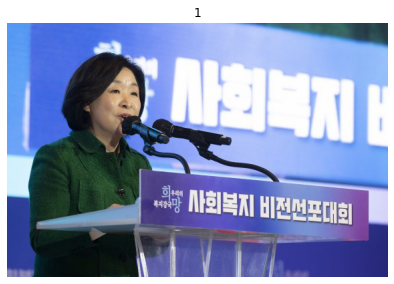

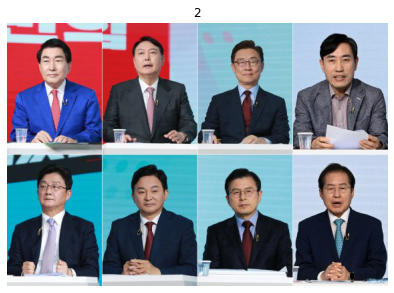

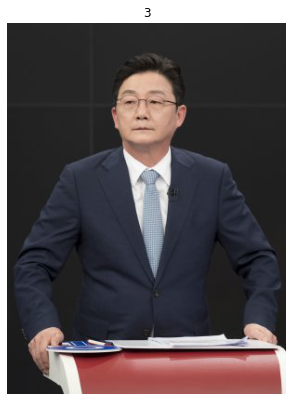

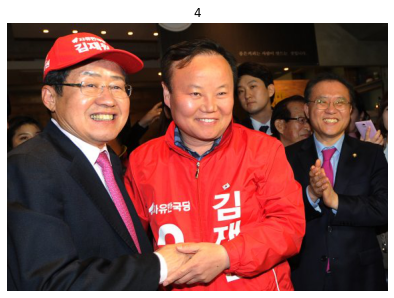

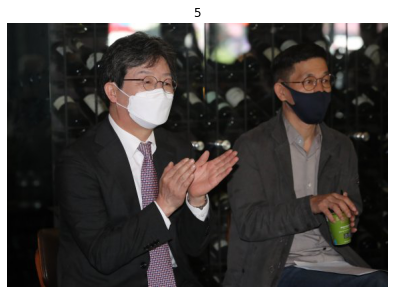

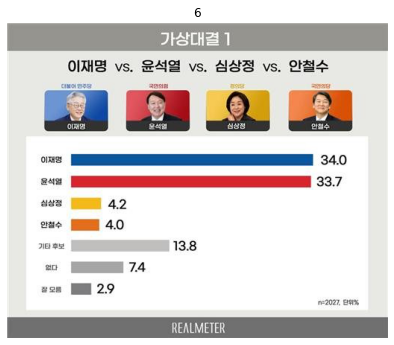

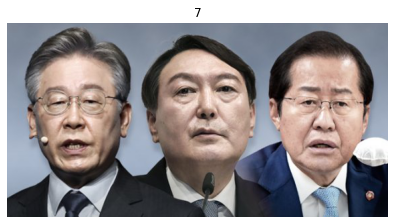

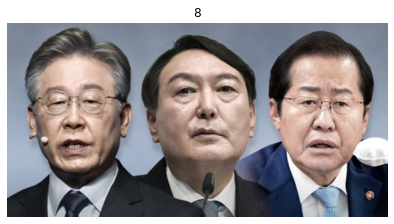

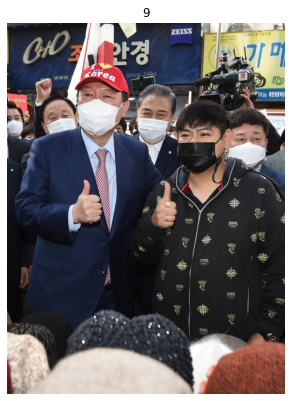

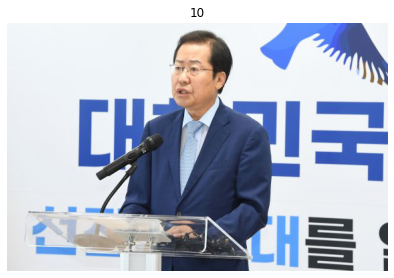

In [54]:
temp = []
temp = sorted(weight_sum, reverse=True)
# print(temp)
# print()
# print(weight_sum)
cnt = 0
while cnt < len(recommend_press3):
    fil_list = list(filter(lambda x: weight_sum[x] == temp[cnt], range(len(temp))))
    for num in fil_list:
        if pd.isna(url_array[num]):
            pass
        print(recommend_press3[num], url_array[num])
#         url = url_array[num]
#         res = requests.get(url)
        
#         request_get_img = Image.open(BytesIO(res.content))
        
        cnt += 1
        url = url_array[num]
#         print(url)
        plt.figure(figsize = (15,15))
        plt.subplot(2,2,1)
        plt.title(cnt)
        try:
            res = requests.get(url)
            request_get_img = Image.open(BytesIO(res.content))
        except:
            pass
        plt.imshow(request_get_img)
        plt.axis('off')
        if cnt > 9:
            break
    if cnt > 9:
        break